In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from IPython.display import Image, HTML
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
sb.set()

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier

from nltk.tokenize import RegexpTokenizer


from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

from nltk.tokenize import RegexpTokenizer
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics


pd.set_option('display.max_columns', 100)

In [2]:
data1 = pd.read_excel('jester-data-1.xls', sheet_name='jester-data-1-new', header=None, names=(x for x in range(0,101)))

In [3]:
test_data = pd.read_excel('jesterjoke2.xlsx', sheet_name = 'Sheet1',header = None)  #name of jester 2 joke texts

new_testdata = test_data[100:]
new_testdata.rename(columns={0:'Jokes'},inplace=True)
new_testdata['Jokes']
new_testdata["ID"] = new_testdata.index + 1


/Users/mingyangtan/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
<ipython-input-3-8cb50c991431>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_testdata["ID"] = new_testdata.index + 1


In [4]:
new_testdata

,Jokes,ID
100,Did you hear about the Buddhist who refused No...,101
101,A man escaped jail by digging a hole from his ...,102
102,"Nurse: Doctor, Doctor, there's an invisible ma...",103
103,"As a pre-med student, I had to take a difficul...",104
104,A couple of hunters are out in the woods in th...,105
105,An engineer dies and reports to the pearly gat...,106
106,(A) The Japanese eat very little fat and suffe...,107
107,A man approached a very beautiful woman in a l...,108
108,"""Do you believe in life after death?"" the boss...",109
109,"One day, a professor was giving a big test to ...",110


In [5]:
data1.rename(columns={0:'num of ratings'},inplace=True)

In [6]:
data1.head()

,num of ratings,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,-8.50,-6.75,-7.18,8.45,-7.18,-7.52,-7.43,-9.81,-9.85,-9.85,-9.37,1.50,-4.37,-9.81,-8.50,1.12,7.82,2.86,9.13,-7.43,2.14,-4.08,-9.08,7.82,5.05,4.95,-9.17,-8.40,-8.40,-8.40,-8.11,-9.13,-9.03,-9.08,-7.14,-6.26,3.79,-0.10,3.93,...,-8.69,-7.14,3.20,8.30,-4.56,0.92,-9.13,-9.42,2.82,-8.64,8.59,3.59,-6.84,-9.03,2.82,-1.36,-9.08,8.30,5.68,-4.81,99.0,99.00,99.0,99.00,99.00,99.00,99.00,-9.42,99.00,99.00,99.00,-7.72,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,6.75,8.64,4.42,7.43,4.56,-0.97,4.66,-0.68,3.30,-1.21,0.87,8.64,8.35,9.17,0.05,7.57,4.71,0.87,-0.39,6.99,6.50,-0.92,7.14,9.03,-1.80,0.73,7.09,3.40,-0.87,7.91,7.82,-3.83,8.64,8.98,-4.32,-3.20,-4.90,-0.92,-1.46,...,3.16,9.03,0.97,-1.31,-6.50,-3.20,8.64,-2.14,0.10,9.03,-6.70,-3.35,-9.03,4.47,4.08,-3.83,8.74,1.12,0.78,7.52,-5.0,2.77,8.3,7.77,7.33,6.21,7.72,8.98,8.64,8.20,3.93,4.85,4.85,6.07,8.98,4.51,-0.05,3.69,4.56,0.58,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,7.33,7.57,9.37,6.17,-6.36,-6.89,-7.86,9.03,9.03,9.03,7.28,99.00,8.25,99.00,99.00,7.48,7.28,7.28,8.93,99.00,6.17,7.28,99.00,99.00,8.98,7.33,99.00,6.17,9.08,7.33,7.52,9.27,9.27,99.00,9.27,99.00,6.17,7.33,9.08,...,99.00,99.00,7.28,7.33,99.00,7.23,99.00,99.00,99.00,9.27,6.46,7.28,99.00,99.00,7.04,7.28,99.00,7.28,8.25,99.00,99.0,99.00,99.0,99.00,99.00,8.93,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,9.03,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,7.33,6.60,6.31,8.11,-7.23,-6.65,1.17,-6.60,-3.64,-2.09,5.34,99.00,99.00,99.00,99.00,2.91,3.93,6.75,6.60,99.00,6.65,-6.12,99.00,7.57,6.21,6.65,99.00,-8.30,7.18,2.82,99.00,1.55,99.00,99.00,99.00,6.84,6.84,-3.98,6.99,...,99.00,6.94,1.55,7.67,99.00,6.55,99.00,99.00,99.00,99.00,0.00,-3.69,99.00,99.00,7.82,0.24,99.00,7.28,-2.33,99.00,99.0,99.00,99.0,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,0.63,99.00,99.00,-2.33,99.00,99.00,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,8.25,6.84,-3.93,7.23,-2.33,-9.66,2.72,-1.36,2.57,4.51,8.20,6.12,8.30,-1.26,7.77,1.89,-1.17,5.68,8.45,4.61,8.06,-9.47,7.28,5.68,2.48,3.20,-1.26,6.80,4.51,2.48,0.34,6.84,0.19,-8.74,5.24,6.31,8.06,1.26,4.51,...,4.42,3.06,8.93,7.82,1.75,8.11,-8.06,-9.17,4.95,3.35,7.38,6.17,4.71,-2.28,7.38,4.56,7.14,4.22,3.01,3.83,99.0,99.00,99.0,99.00,99.00,99.00,4.13,99.00,99.00,99.00,5.24,5.92,0.87,7.28,3.93,-0.63,6.31,4.71,2.82,2.96,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


In [7]:
data1[(data1==99)] = np.nan

In [8]:
data1.head()

,num of ratings,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
0,74.0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,-8.50,-6.75,-7.18,8.45,-7.18,-7.52,-7.43,-9.81,-9.85,-9.85,-9.37,1.50,-4.37,-9.81,-8.50,1.12,7.82,2.86,9.13,-7.43,2.14,-4.08,-9.08,7.82,5.05,4.95,-9.17,-8.40,-8.40,-8.40,-8.11,-9.13,-9.03,-9.08,-7.14,-6.26,3.79,-0.10,3.93,...,-8.69,-7.14,3.20,8.30,-4.56,0.92,-9.13,-9.42,2.82,-8.64,8.59,3.59,-6.84,-9.03,2.82,-1.36,-9.08,8.30,5.68,-4.81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-9.42,NaN,NaN,NaN,-7.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.82,NaN,NaN,NaN,NaN,NaN,-5.63,NaN,NaN,NaN
1,100.0,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,6.75,8.64,4.42,7.43,4.56,-0.97,4.66,-0.68,3.30,-1.21,0.87,8.64,8.35,9.17,0.05,7.57,4.71,0.87,-0.39,6.99,6.50,-0.92,7.14,9.03,-1.80,0.73,7.09,3.40,-0.87,7.91,7.82,-3.83,8.64,8.98,-4.32,-3.20,-4.90,-0.92,-1.46,...,3.16,9.03,0.97,-1.31,-6.50,-3.20,8.64,-2.14,0.10,9.03,-6.70,-3.35,-9.03,4.47,4.08,-3.83,8.74,1.12,0.78,7.52,-5.0,2.77,8.3,7.77,7.33,6.21,7.72,8.98,8.64,8.20,3.93,4.85,4.85,6.07,8.98,4.51,-0.05,3.69,4.56,0.58,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49.0,NaN,NaN,NaN,NaN,9.03,9.27,9.03,9.27,NaN,NaN,7.33,7.57,9.37,6.17,-6.36,-6.89,-7.86,9.03,9.03,9.03,7.28,NaN,8.25,NaN,NaN,7.48,7.28,7.28,8.93,NaN,6.17,7.28,NaN,NaN,8.98,7.33,NaN,6.17,9.08,7.33,7.52,9.27,9.27,NaN,9.27,NaN,6.17,7.33,9.08,...,NaN,NaN,7.28,7.33,NaN,7.23,NaN,NaN,NaN,9.27,6.46,7.28,NaN,NaN,7.04,7.28,NaN,7.28,8.25,NaN,NaN,NaN,NaN,NaN,NaN,8.93,NaN,NaN,NaN,9.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.03,NaN,NaN,NaN,9.08,NaN,NaN,NaN,NaN,NaN,NaN
3,48.0,NaN,8.35,NaN,NaN,1.80,8.16,-2.82,6.21,NaN,1.84,7.33,6.60,6.31,8.11,-7.23,-6.65,1.17,-6.60,-3.64,-2.09,5.34,NaN,NaN,NaN,NaN,2.91,3.93,6.75,6.60,NaN,6.65,-6.12,NaN,7.57,6.21,6.65,NaN,-8.30,7.18,2.82,NaN,1.55,NaN,NaN,NaN,6.84,6.84,-3.98,6.99,...,NaN,6.94,1.55,7.67,NaN,6.55,NaN,NaN,NaN,NaN,0.00,-3.69,NaN,NaN,7.82,0.24,NaN,7.28,-2.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.63,NaN,NaN,-2.33,NaN,NaN,NaN,NaN,NaN,0.53,NaN,NaN,NaN,NaN,NaN,NaN
4,91.0,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,8.25,6.84,-3.93,7.23,-2.33,-9.66,2.72,-1.36,2.57,4.51,8.20,6.12,8.30,-1.26,7.77,1.89,-1.17,5.68,8.45,4.61,8.06,-9.47,7.28,5.68,2.48,3.20,-1.26,6.80,4.51,2.48,0.34,6.84,0.19,-8.74,5.24,6.31,8.06,1.26,4.51,...,4.42,3.06,8.93,7.82,1.75,8.11,-8.06,-9.17,4.95,3.35,7.38,6.17,4.71,-2.28,7.38,4.56,7.14,4.22,3.01,3.83,NaN,NaN,NaN,NaN,NaN,NaN,4.13,NaN,NaN,NaN,5.24,5.92,0.87,7.28,3.93,-0.63,6.31,4.71,2.82,2.96,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


In [9]:
 data1.mean().sort_values(ascending=False).head(5)
ave1 =data1.mean().sort_values(ascending=False)

In [10]:
data1[50].value_counts().head(10)

5.73    173
8.83    159
7.28    159
6.50    158
5.58    156
9.08    155
4.17    150
5.53    149
9.03    147
8.79    144
Name: 50, dtype: int64

/Users/mingyangtan/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/mingyangtan/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 0.98, 'Joke #50 - Ratings/Num of ratings')

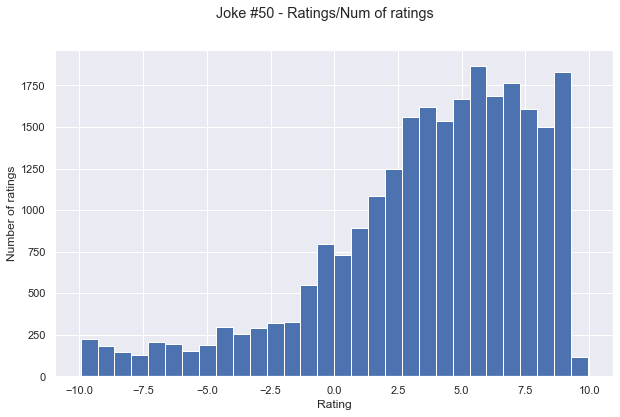

In [11]:
#Visualise ratings for the funniest average joke #50
plt.figure(figsize=(10,6))
plt.hist(data1[50],bins=30)
plt.xlabel('Rating')
plt.ylabel('Number of ratings')
plt.suptitle('Joke #50 - Ratings/Num of ratings')


In [12]:
dataCorr = data1.corrwith(data1[50])

In [13]:
dataCorr.sort_values(ascending=False).head(5)

50    1.000000
29    0.425569
35    0.404140
53    0.385832
36    0.384044
dtype: float64

In [14]:
corr_df = pd.DataFrame(data=dataCorr,columns=['Correlation'])

In [15]:
corr_df.drop('num of ratings',axis=0,inplace=True)

In [16]:
corr_df.sort_values('Correlation',ascending=False).head(10)


,Correlation
50,1.000000
29,0.425569
35,0.404140
53,0.385832
36,0.384044
56,0.383129
69,0.381586
26,0.376989
32,0.375201
21,0.374786


In [17]:
corr_df['ratings count'] = data1.drop('num of ratings',axis=1).count()

In [18]:
corr_df.sort_values('Correlation',ascending=False).head(10)


,Correlation,ratings count
50,1.000000,24972
29,0.425569,24934
35,0.404140,24952
53,0.385832,24971
36,0.384044,24965
56,0.383129,24740
69,0.381586,24916
26,0.376989,23750
32,0.375201,24948
21,0.374786,24921


In [19]:
import nltk
from nltk.corpus import stopwords


In [20]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mingyangtan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
import nltk
from nltk.corpus import stopwords


In [22]:
stopwords = nltk.corpus.stopwords.words('english')
newStopWords = 'says replies replied said asked just ve ll goes does say one two go going asks want every time'.split()
stopwords.extend(newStopWords)



In [23]:

average = ave1.reset_index()
ave = average.drop(columns = ['index'])

In [24]:
directory_path = '/Users/mingyangtan/Downloads/jester Kmeans Method' # insert path to folder with all individual joke files
filenames = []
jokes = []
for file in os.listdir(directory_path):
    if file.endswith(".html"):
        file = os.path.join(directory_path, file)
        joke = pd.read_html(file,flavor ='bs4')[0]
        if type(joke[0].iloc[0])== np.float64:
            jokes.append(joke[1])
        else:
            jokes.append(joke[0])
            
df_jokes = pd.concat(jokes, ignore_index=True)
df_jokes.head()

0    Just a thought .. Before criticizing someone, ...
1    A man visits the doctor. The doctor says "I ha...
2    What a woman says: "This place is a mess! C'mo...
3    How many men does it take to screw in a light ...
4    How many Irishmen does it take to change a lig...
dtype: object

In [25]:
ex_dict = {
    'Jokes': df_jokes
}

columns = ['Jokes']

df_noid = pd.DataFrame(ex_dict)
df_noid

,Jokes
0,"Just a thought .. Before criticizing someone, ..."
1,"A man visits the doctor. The doctor says ""I ha..."
2,"What a woman says: ""This place is a mess! C'mo..."
3,How many men does it take to screw in a light ...
4,How many Irishmen does it take to change a lig...
...,...
95,"""May I take your order?"" the waiter asked. ""Ye..."
96,"Hillary, Bill Clinton and the Pope are sitting..."
97,The father was very anxious to marry off his o...
98,Arnold Swartzeneger and Sylvester Stallone are...


In [26]:
df = pd.DataFrame(df_noid)

df["ID"] = df.index + 1

In [27]:
df

,Jokes,ID
0,"Just a thought .. Before criticizing someone, ...",1
1,"A man visits the doctor. The doctor says ""I ha...",2
2,"What a woman says: ""This place is a mess! C'mo...",3
3,How many men does it take to screw in a light ...,4
4,How many Irishmen does it take to change a lig...,5
...,...,...
95,"""May I take your order?"" the waiter asked. ""Ye...",96
96,"Hillary, Bill Clinton and the Pope are sitting...",97
97,The father was very anxious to marry off his o...,98
98,Arnold Swartzeneger and Sylvester Stallone are...,99


In [28]:
dff = pd.DataFrame(df)

dff["AverageRating"] = ave

In [29]:
dff.head()

,Jokes,ID,AverageRating
0,"Just a thought .. Before criticizing someone, ...",1,72.381174
1,"A man visits the doctor. The doctor says ""I ha...",2,3.665085
2,"What a woman says: ""This place is a mess! C'mo...",3,3.574720
3,How many men does it take to screw in a light ...,4,3.312500
4,How many Irishmen does it take to change a lig...,5,3.189821


In [30]:
dff['Jokes']

0     Just a thought .. Before criticizing someone, ...
1     A man visits the doctor. The doctor says "I ha...
2     What a woman says: "This place is a mess! C'mo...
3     How many men does it take to screw in a light ...
4     How many Irishmen does it take to change a lig...
                            ...                        
95    "May I take your order?" the waiter asked. "Ye...
96    Hillary, Bill Clinton and the Pope are sitting...
97    The father was very anxious to marry off his o...
98    Arnold Swartzeneger and Sylvester Stallone are...
99    A woman has twins, and gives them up for adopt...
Name: Jokes, Length: 100, dtype: object

In [31]:
dff1 = dff[:50]  #Train set
dff2 = dff[50:100] #Test Set
dff1.head()

,Jokes,ID,AverageRating
0,"Just a thought .. Before criticizing someone, ...",1,72.381174
1,"A man visits the doctor. The doctor says ""I ha...",2,3.665085
2,"What a woman says: ""This place is a mess! C'mo...",3,3.574720
3,How many men does it take to screw in a light ...,4,3.312500
4,How many Irishmen does it take to change a lig...,5,3.189821


In [32]:
dff2.head()

,Jokes,ID,AverageRating
50,"A horse walks into a bar. Bartender says: ""So,...",51,1.039130
51,They asked the Japanese visitor if they have e...,52,0.998635
52,A man piloting a hot air balloon discovers he ...,53,0.918927
53,"A man, recently completing a routine physical ...",54,0.904573
54,An old Scotsmen is sitting with a younger Scot...,55,0.902718


In [33]:
dff.dtypes


Jokes             object
ID                 int64
AverageRating    float64
dtype: object

# TfidVectorizer and KMeans Clustering

In [34]:
tf = TfidfVectorizer(analyzer = 'word', ngram_range = (1, 2), min_df = 5, stop_words = stopwords,max_features= 17)
tfidf_matri = tf.fit(dff['Jokes'])
tfidf_matrix = tfidf_matri.transform(dff1['Jokes'])
unseen_tfidf = tf.transform(dff2['Jokes'])



Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters
Fit 12 clusters
Fit 14 clusters
Fit 16 clusters
Fit 18 clusters
Fit 20 clusters
Fit 22 clusters
Fit 24 clusters
Fit 26 clusters
Fit 28 clusters
Fit 30 clusters
Fit 32 clusters
Fit 34 clusters
Fit 36 clusters
Fit 38 clusters
Fit 40 clusters
Fit 42 clusters
Fit 44 clusters
Fit 46 clusters
Fit 48 clusters
Fit 50 clusters


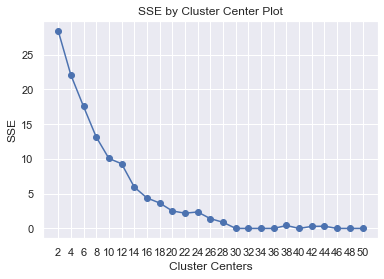

In [35]:
#used to find the optimal number of clusters
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 2)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=50, batch_size=5, random_state=1).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    
find_optimal_clusters(tfidf_matrix, 50)

In [36]:
clusters =  MiniBatchKMeans(n_clusters=8, init_size=40, batch_size=5, random_state=100000).fit_predict(tfidf_matrix)



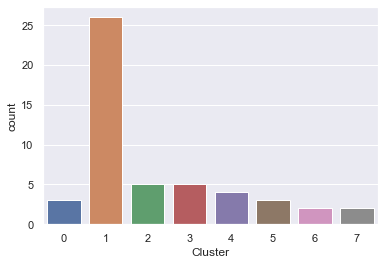

In [37]:


# Append Labels to the Data
X_labeled = dff1.copy()
X_labeled["Cluster"] = pd.Categorical(clusters)

# Summary of the Cluster Labels
sb.countplot(X_labeled["Cluster"])

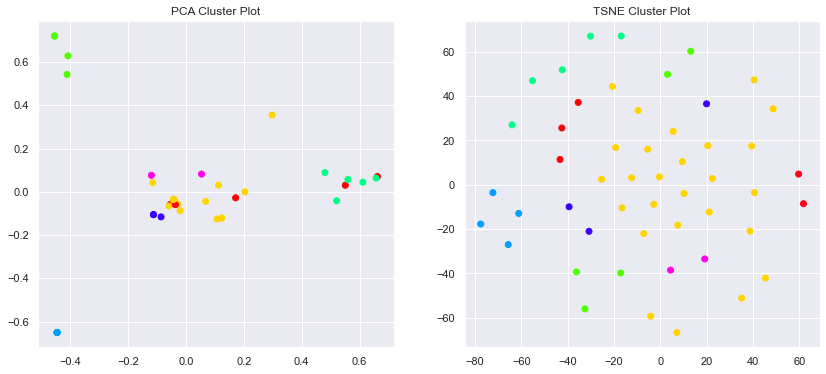

In [38]:
#Visualise the clusters of the train dataset
def plot_tsne_pca(data, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=50, replace=False)
    
    pca = PCA(n_components=15).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=15).fit_transform(data[max_items,:].todense()))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=50, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')
    
plot_tsne_pca(tfidf_matrix, clusters)

In [39]:
#Top keywords in each cluster 
def get_top_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i+1))
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))
            
get_top_keywords(tfidf_matrix, clusters, tf.get_feature_names(), 10)




Cluster 1
make,engineer,difference,car,bill,like,would,get,man,call

Cluster 2
walks,woman,man,take,make,car,well,engineer,get,like

Cluster 3
engineer,difference,car,call,bill,get,would,room,take,many

Cluster 4
bill,difference,would,get,take,car,well,like,woman,man

Cluster 5
woman,make,get,engineer,car,call,bill,like,would,difference

Cluster 6
like,woman,man,many,room,take,back,car,would,bill

Cluster 7
would,engineer,difference,car,call,bill,get,back,woman,room

Cluster 8
would,get,engineer,difference,car,call,bill,like,back,walks


In [40]:
#Create Clustering Model using KMeans and Fitting the Clustering Model on the Test Data
clusters_test =  MiniBatchKMeans(n_clusters=8, init_size=5000, batch_size=2048, random_state=20).fit(tfidf_matrix)
clusters_test =  clusters_test.predict(unseen_tfidf)
clusters_test



array([6, 2, 5, 5, 2, 2, 6, 1, 2, 4, 2, 6, 2, 2, 7, 4, 2, 2, 7, 2, 2, 2,
       7, 2, 5, 7, 2, 4, 2, 1, 2, 2, 2, 2, 1, 4, 3, 2, 7, 6, 2, 4, 2, 2,
       2, 1, 3, 0, 2, 7], dtype=int32)

In [41]:
clusters_test2 =  MiniBatchKMeans(n_clusters=8, init_size=5000, batch_size=2048, random_state=20).fit(unseen_tfidf)
clusters_test2 =  clusters_test2.predict(unseen_tfidf)
clusters_test2

array([4, 3, 6, 6, 6, 3, 4, 5, 3, 6, 3, 4, 3, 2, 0, 1, 1, 3, 0, 2, 3, 2,
       7, 3, 6, 7, 3, 1, 3, 5, 6, 3, 3, 2, 5, 1, 3, 3, 0, 4, 3, 1, 1, 3,
       3, 5, 3, 1, 3, 7], dtype=int32)

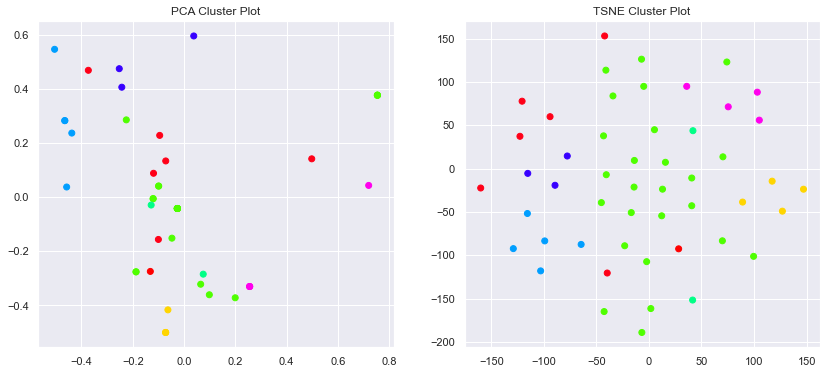

In [42]:
# Visualize the Clusters in the Data
def plot_tsne_pca(data, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=50, replace=False)
    
    pca = PCA(n_components=15).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=15).fit_transform(data[max_items,:].todense()))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=50, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')
    
plot_tsne_pca(unseen_tfidf, clusters_test)

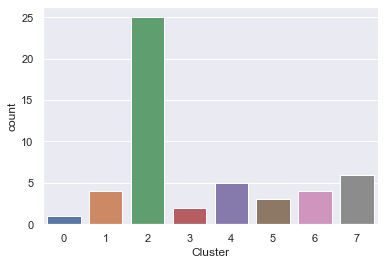

In [43]:
# Append Labels to the Data
X2_labeled = dff2.copy()
X2_labeled["Cluster"] = pd.Categorical(clusters_test)

# Summary of the Cluster Labels
sb.countplot(X2_labeled["Cluster"])

In [44]:
X_labeled

,Jokes,ID,AverageRating,Cluster
0,"Just a thought .. Before criticizing someone, ...",1,72.381174,1
1,"A man visits the doctor. The doctor says ""I ha...",2,3.665085,3
2,"What a woman says: ""This place is a mess! C'mo...",3,3.574720,3
3,How many men does it take to screw in a light ...,4,3.312500,2
4,How many Irishmen does it take to change a lig...,5,3.189821,2
5,A man and Cindy Crawford get stranded on a des...,6,3.155988,0
6,A bus station is where a bus stops. A train st...,7,3.006351,1
7,There once was a man and a woman that both got...,8,2.976021,3
8,What's the difference between a used tire and ...,9,2.972455,4
9,A Jewish young man was seeing a psychiatrist f...,10,2.939463,3


In [45]:
X2_labeled


,Jokes,ID,AverageRating,Cluster
50,"A horse walks into a bar. Bartender says: ""So,...",51,1.039130,6
51,They asked the Japanese visitor if they have e...,52,0.998635,2
52,A man piloting a hot air balloon discovers he ...,53,0.918927,5
53,"A man, recently completing a routine physical ...",54,0.904573,5
54,An old Scotsmen is sitting with a younger Scot...,55,0.902718,2
55,Q.\tWhat's O. J. Simpson's Internet address? A...,56,0.868662,2
56,A Panda bear walks into a bar. Sits down at a ...,57,0.859494,6
57,Q: How many programmers does it take to change...,58,0.767692,1
58,"A mechanical, electrical and a software engine...",59,0.715392,2
59,Q. What's the difference between a man and a t...,60,0.694418,4


In [46]:
tfidf_matrix

<50x17 sparse matrix of type '<class 'numpy.float64'>'
	with 69 stored elements in Compressed Sparse Row format>

In [47]:
unseen_tfidf

<50x17 sparse matrix of type '<class 'numpy.float64'>'
	with 76 stored elements in Compressed Sparse Row format>

In [48]:
clusters #shows the clusters each joke is in from 1 to 50

array([1, 3, 3, 2, 2, 0, 1, 3, 4, 3, 1, 6, 7, 4, 1, 1, 2, 1, 1, 1, 1, 1,
       7, 5, 0, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 4, 5, 1, 3, 1, 4, 1, 6, 1,
       1, 0, 1, 1, 1, 5], dtype=int32)

In [49]:
clusters_test #shows the clusters each joke is in from 51 to 100 when trained by train data set

array([6, 2, 5, 5, 2, 2, 6, 1, 2, 4, 2, 6, 2, 2, 7, 4, 2, 2, 7, 2, 2, 2,
       7, 2, 5, 7, 2, 4, 2, 1, 2, 2, 2, 2, 1, 4, 3, 2, 7, 6, 2, 4, 2, 2,
       2, 1, 3, 0, 2, 7], dtype=int32)

In [50]:
clusters_test2 #shows the clusters each joke is in from 51 to 100 when trained by test data set itself

array([4, 3, 6, 6, 6, 3, 4, 5, 3, 6, 3, 4, 3, 2, 0, 1, 1, 3, 0, 2, 3, 2,
       7, 3, 6, 7, 3, 1, 3, 5, 6, 3, 3, 2, 5, 1, 3, 3, 0, 4, 3, 1, 1, 3,
       3, 5, 3, 1, 3, 7], dtype=int32)

In [51]:
metrics.fowlkes_mallows_score(clusters_test2, clusters_test)#The Fowlkes-Mallows index (sklearn.metrics.fowlkes_mallows_score) can be used when the ground truth class assignments of the samples is known. The Fowlkes-Mallows score FMI is defined as the geometric mean of the pairwise precision and recall:

0.6128374085780669

In [52]:
metrics.homogeneity_score(clusters_test2, clusters_test)

    #homogeneity: each cluster contains only members of a single class.

    #completeness: all members of a given class are assigned to the same cluster.


0.6670522304665373

In [53]:
metrics.completeness_score(clusters_test2, clusters_test)

0.7622644403129316

In [54]:
metrics.v_measure_score(clusters_test2,clusters_test)

0.7114871120040553

In [55]:
from sklearn import metrics

def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix) 


purity_score(clusters_test2,clusters_test)

0.76

In [56]:
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(clusters_test2, clusters_test)

0.4857849833750032